<a href="https://colab.research.google.com/github/wsilveira-splunk/projeto_final_ciencia_dados_02_2020/blob/master/lz78.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash

cd /content/

if [ ! -d "lz78_algorithm" ]; then
  git clone https://github.com/wsilveira-splunk/lz78_algorithm.git
fi

cd lz78_algorithm
git pull origin master
cd -

Already up to date.
/content


From https://github.com/wsilveira-splunk/lz78_algorithm
 * branch            master     -> FETCH_HEAD


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def lz78_compress(raw_text):

    dictionary = {'': 0}

    last_seq_letter = ''
    lz78_text = ''

    for letter in raw_text:
        cur_seq_letter = last_seq_letter + letter
        if cur_seq_letter in dictionary:
            last_seq_letter = cur_seq_letter
        else:
            lz78_text += f'{dictionary[last_seq_letter]:012b}' + letter
            dictionary[cur_seq_letter] = len(dictionary)
            last_seq_letter = ''

    if last_seq_letter != '':
        lz78_text += f'{dictionary[last_seq_letter]:012b}'

    #print(dictionary)

    return lz78_text

In [4]:
def lz78_decompress(lz78_text):

    dictionary = {f'{0:012b}': ''}

    raw_text = ''
    seq_letter = ''

    for idx, letter in enumerate(lz78_text, 1):
        if (idx % 13) == 0:
            raw_text += dictionary[seq_letter] + letter
            dictionary[
                f'{len(dictionary):012b}'] = dictionary[seq_letter] + letter
            seq_letter = ''
        else:
            seq_letter += letter

    if seq_letter != '':
        raw_text += dictionary[seq_letter]

    return raw_text

In [5]:
def normalize_data(data):
    norm_data = ''
    
    for _byte in data:
        __byte = reversed(f'{_byte:08b}')
        for _bit in __byte:
          norm_data += _bit
    return norm_data

In [6]:
seq_bin_path = '/content/lz78_algorithm/files/seq.bin'

with open(seq_bin_path, 'rb') as file:
    data = file.read()
    data = normalize_data(data)
    print('Length of read data: {} bits'.format(len(data)))

    compressed = lz78_compress(data)
    print('Length of compressed data: {} bits'.format(len(compressed)))
    decompressed = lz78_decompress(compressed)
    print('Length of decompressed data: {} bits'.format(len(decompressed)))

    if data == decompressed:
        print('\nDecompressed data matches compressed data - bingo!\n')

Length of read data: 400000 bits
Length of compressed data: 49282 bits
Length of decompressed data: 400000 bits

Decompressed data matches compressed data - bingo!



In [7]:
seq_zipped_bin_path = '/content/lz78_algorithm/seq.7z'

sum_ones = 0
sum_zeros = 0

with open(seq_zipped_bin_path, 'rb') as file:
    data_zipped = file.read()
    data_zipped = normalize_data(data_zipped)

    for _bit in data_zipped:
        if _bit == '1':
            sum_ones += 1
        elif _bit == '0':
            sum_zeros += 1

print('Sum of ones of original data: {}'.format(sum_ones))
print('Sum of zeros of original data: {}'.format(sum_zeros))

Sum of ones of original data: 13152
Sum of zeros of original data: 13680


In [8]:
def autocorr(data):
    rxx = np.correlate(data, data, mode='full')
    return rxx[round(rxx.size/2)-1:]

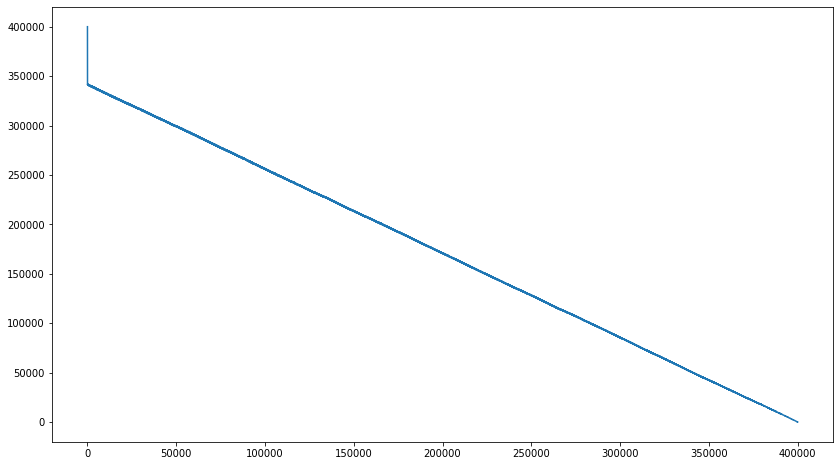

In [9]:
data_array = list(map(lambda x: (2 * int(x) - 1), data)) 
rxx = autocorr(data_array)

plt.figure(figsize=(14,8)) 
plt.plot(rxx) 
plt.show()

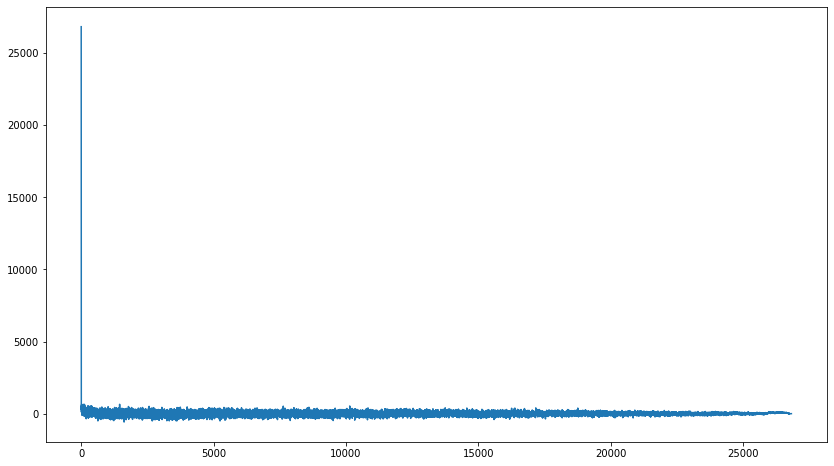

In [10]:
data_array = list(map(lambda x: (2 * int(x) - 1), data_zipped)) 
rxx = autocorr(data_array)

plt.figure(figsize=(14,8)) 
plt.plot(rxx) 
plt.show()